Project Planning Stage - Individual

Data Description: 
Number of observations: 196
Number of variables: 7, including: 

1. Player's experience (experience) (chr)
       includes: Pro, Veteran, Regular, Amateur
3. Subscription status (subscribe) (lgl)
4. Hashed Email (hashedEmail) (chr)
5. Total hours played on Minecraft server (played_hours) (dbl)
6. Name (name) (chr)
7. Gender (gender) (chr)
8. Age (Age) (dbl)

Data was collected by computer science research group at UBC, led by Frank Wood. The group recorded data from players that signed up to play on their Minecraft server. 

- Gender includes more than "Female" and "Male" option, for instance, "Prefer not to say", or "Non-binary" . This should be taken into consideration if any analysis on gender is done. 
- Age includes NA values.
- It is unclear what the distinctions between "Pro", "Veteran", "Regular", and "Amateur" player experience are and how this assignment was made. 

Questions:
Broad: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter and how do these features differ between player types?

Specific: Can total hours played on the Minecraft server and player experience predict whether the player will subscribe to the game-related newsletter in the players.csv data set? 

Exploratory Data Analysis:

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Please download "players.csv" data file before proceeding.

In [2]:
player_data <- read_csv("players.csv")
player_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [3]:
print("Number of Players in Each Experience Level")
player_count_byexperience <- player_data |>
    count(experience)
player_count_byexperience

print("Mean Played Hours")
mean_played_hours <- player_data |>
    summarise(mean_played_hours = mean(played_hours))
mean_played_hours

print("Mean Played Hours Group by Experience Level")
mean_played_hours_byexperience <- player_data |>
    group_by(experience) |>
    summarise(mean_played_hours = mean(played_hours))
mean_played_hours_byexperience

[1] "Number of Players in Each Experience Level"


experience,n
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


[1] "Mean Played Hours"


mean_played_hours
<dbl>
5.845918


[1] "Mean Played Hours Group by Experience Level"


experience,mean_played_hours
<chr>,<dbl>
Amateur,6.0174603
Beginner,1.2485714
Pro,2.6000000
Regular,18.2083333
Veteran,0.6479167


In [4]:
print("Mean Player Age")
mean_age <- player_data |>
    summarise(mean_age = mean(Age, na.rm = TRUE))
mean_age

print("Mean Player Age by Experience Level")
mean_age_byexperience <- player_data |>
    group_by(experience) |>
    summarise(mean_age = mean(Age, na.rm = TRUE)) 
mean_age_byexperience

[1] "Mean Player Age"


mean_age
<dbl>
21.13918


[1] "Mean Player Age by Experience Level"


experience,mean_age
<chr>,<dbl>
Amateur,21.36508
Beginner,21.65714
Pro,16.92308
Regular,22.02857
Veteran,20.95833


In [5]:
print("Subscription Status Count by Experience Level")
sub_byexperience <- player_data |>
    group_by(experience) |>
    count(subscribe)
sub_byexperience

print("Subscribed Status Count by Experience Level")
sub_byexperience1 <- player_data |>
    filter(subscribe == "TRUE") |>
    select(experience, subscribe)
sub_byexperience1

[1] "Subscription Status Count by Experience Level"


experience,subscribe,n
<chr>,<lgl>,<int>
Amateur,FALSE,18
Amateur,TRUE,45
Beginner,FALSE,8
Beginner,TRUE,27
Pro,FALSE,4
Pro,TRUE,10
Regular,FALSE,7
Regular,TRUE,29
Veteran,FALSE,15


[1] "Subscribed Status Count by Experience Level"


experience,subscribe
<chr>,<lgl>
Pro,TRUE
Veteran,TRUE
Amateur,TRUE
Regular,TRUE
Amateur,TRUE
Regular,TRUE
Amateur,TRUE
Veteran,TRUE
Veteran,TRUE


Warning message in scale_y_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


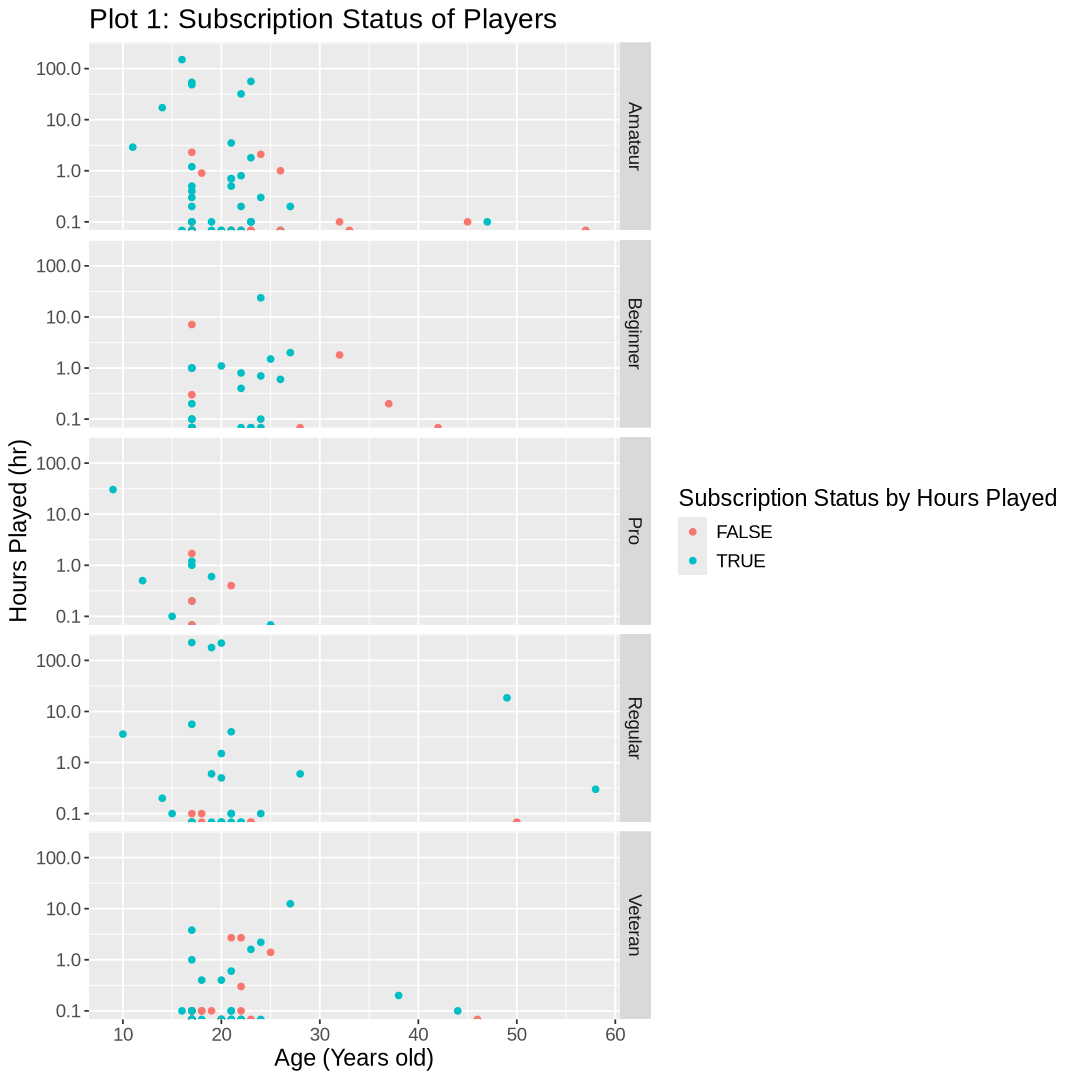

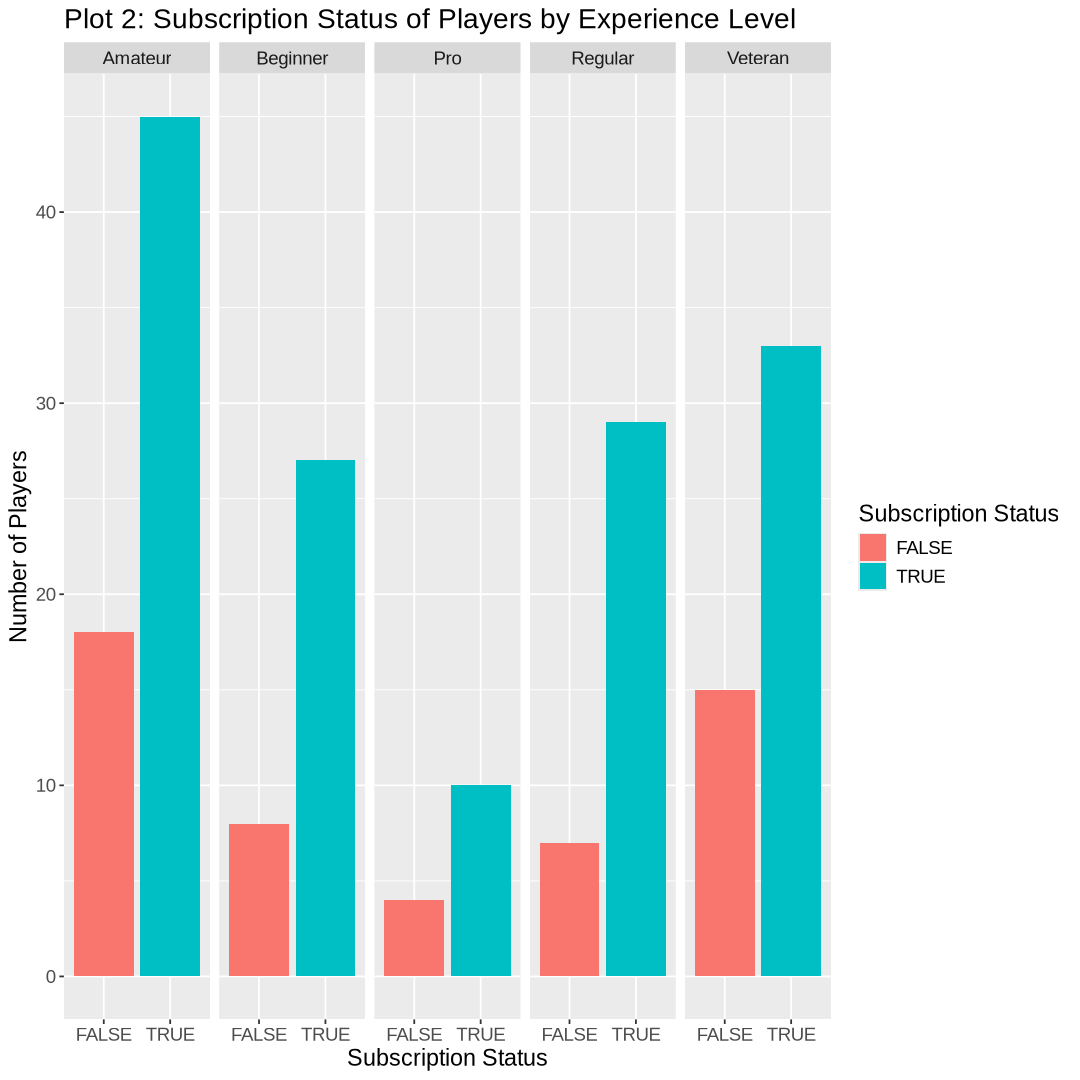

In [6]:
options(repr.plot.width = 9, repr.plot.height = 9) 

plot1 <- player_data |>
    ggplot(aes(x = Age, y = played_hours, colour = subscribe)) +
    geom_point() +
    labs( x = "Age (Years old)",
         y = "Hours Played (hr)",
         colour = "Subscription Status by Hours Played",
         title = "Plot 1: Subscription Status of Players") +
    scale_y_log10(labels = label_comma()) +
    facet_grid(rows = vars(experience)) +
    theme(text = element_text(size = 14)) 
plot1

plot2 <- sub_byexperience |>
    ggplot(aes(x = subscribe, y = n, fill = subscribe)) +
    geom_bar(stat = "identity") +
    labs( x = "Subscription Status",
         y = "Number of Players", 
         fill = "Subscription Status",
         title = "Plot 2: Subscription Status of Players by Experience Level") +
    facet_grid(cols = vars(experience)) +
    theme(text = element_text(size = 14)) 
plot2

Plot 1 helps visualize relationship between age and total hours played, and if these variable influence subscription status. It seems that the younger the age, the more hours played. With the most hours played concentrated around age 20 years old. It is hard to see a pattern with subscription status with just the graph, so predictive analysis will need to be done to see if there is a relation. 

Plot 2 helps visualize subscription status and experience level. It seems that "Amateur" and "Veteran" Experience Levels have the most subscribed players, while "Pro" have the least subscribed players. However, this visualization would be more effective if it used percentages, instead of count. Using percentage would help account for some categories having more people than others. (I just don't know how to use percentages...)

Methods and Plan:


I believe using Classification with K-nearest neighbors method would be most effective for addressing the question of interest. 

- Classification predicts a category based on variables. In this case, we need to predict Subscription status, which is a categorical class, based on variables, namely Total hours play and Experience Level. 

- An assumption that must be made is that the data points that are close together are more similar to each other than data points that are far away. That way, using k-NN provides an accurate and useful prediction for a new data point.

- Limitation of this method is that it may not work well if variables are imbalanced. Standardization, namely scaling and centering, will be required. Moreover, k-NN may not work with missing variable values, that will need to be addressed either by imputation or removing the missing data points. 

- The model, specifically the number of neighbors (K), will be choosen by evaluating and tuning the model before predicting. This will include splitting the data into training and testing sets, doing cross-validation on training set, and evaluating accuracy by predicting testing set.   

- The data will be split 75% for training and 25% for testing. 5-fold cross validation will be used. 



GitHub Repository: 

https://github.com/Xian341/DSCI_Project_Individual


Predictive analysis

Tided Data for Predictive Analysis:
- Selected only experience, age, total hours played, and subscription status vairables

In [7]:
set.seed(1)

players_pred <- player_data |>
    select(experience, Age, played_hours, subscribe) |>
    filter(Age != "NA") |>
    mutate(subscribe = as_factor(subscribe)) |>
    mutate(subscribe = fct_recode(subscribe, "Subscribed" = "TRUE", "Not Subscribed" = "FALSE"))
players_pred

experience,Age,played_hours,subscribe
<chr>,<dbl>,<dbl>,<fct>
Pro,9,30.3,Subscribed
Veteran,17,3.8,Subscribed
Veteran,17,0.0,Not Subscribed
Amateur,21,0.7,Subscribed
Regular,21,0.1,Subscribed
Amateur,17,0.0,Subscribed
Regular,19,0.0,Subscribed
Amateur,21,0.0,Not Subscribed
Amateur,47,0.1,Subscribed


Choosing K:
1. Made model specification, specifying tune
2. Found accuracy for K values of 1 to 20
3. Chose K value with higheset accuracy


In [9]:
players_split <- initial_split(players_pred, prop = 0.75, strata = subscribe)
players_train <- training(players_split) 
players_test <- testing(players_split)

players_vfold <- vfold_cv(players_train, v = 5, strata = subscribe)

knn_spec_tune <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

player_train_recipe <- recipe(subscribe ~ Age + played_hours, data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 3))

knn_results <- workflow() |>
  add_recipe(player_train_recipe) |>
  add_model(knn_spec_tune) |>
  tune_grid(resamples = players_vfold, grid = k_vals) |>
  collect_metrics()

accuracies <- knn_results |>
    filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4482266,5,0.035788135,Preprocessor1_Model01
4,accuracy,binary,0.4903941,5,0.044970810,Preprocessor1_Model02
7,accuracy,binary,0.5938588,5,0.044830160,Preprocessor1_Model03
10,accuracy,binary,0.7168473,5,0.024165763,Preprocessor1_Model04
13,accuracy,binary,0.7178325,5,0.021132603,Preprocessor1_Model05
16,accuracy,binary,0.7111658,5,0.023462162,Preprocessor1_Model06
19,accuracy,binary,0.7382923,5,0.011988483,Preprocessor1_Model07
22,accuracy,binary,0.7311494,5,0.005037841,Preprocessor1_Model08
25,accuracy,binary,0.7311494,5,0.005037841,Preprocessor1_Model09


neighbors,mean,percent accuracy
<dbl>,<dbl>,<dbl>
19,0.7382923,73.82923


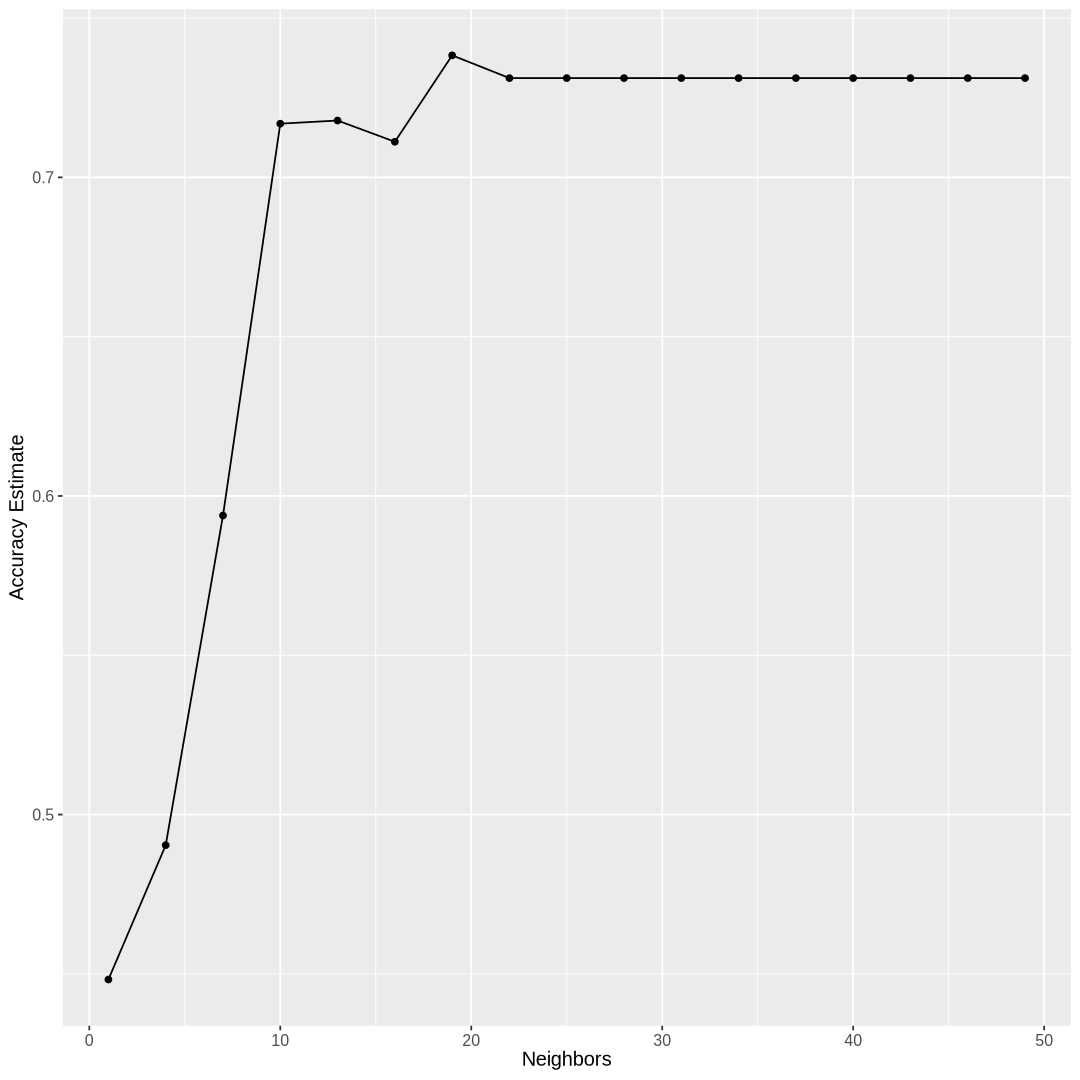

In [10]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))
accuracy_vs_k

best_k <- accuracies |>
    arrange(desc(mean)) |>
    head(1) |>
    select(neighbors, mean) |>
    mutate("percent accuracy" = mean*100)
best_k

Predictive Analysis Steps:
1. Split Data into training and testing sets
2. Found proportion of subscribed and not subscribed in data (This will be majority classifier that we will use to compare our prediction model to)

In [11]:
players_train_prop <- players_train |>
    group_by(subscribe) |>
    summarize(n = n()) |>
    mutate(percent = 100*n/nrow(players_train))
players_train_prop


subscribe,n,percent
<fct>,<int>,<dbl>
Not Subscribed,39,26.89655
Subscribed,106,73.10345


Evlatuating Classifer using K = 19

In [14]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 19) |>
    set_engine("kknn") |>
    set_mode("classification")

player_recipe <- recipe(subscribe ~ Age + played_hours, data = players_pred) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_fit <- workflow() |>
    add_recipe(player_recipe) |>
    add_model(knn_spec) |>
    fit(data = players_train)
knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(19,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2551724
Best kernel: rectangular
Best k: 19

In [15]:
players_prediction <- predict(knn_fit, players_test) |>
    bind_cols(players_test) 
players_prediction

.pred_class,experience,Age,played_hours,subscribe
<fct>,<chr>,<dbl>,<dbl>,<fct>
Subscribed,Amateur,17,0.0,Subscribed
Not Subscribed,Amateur,47,0.1,Subscribed
Subscribed,Veteran,22,0.0,Subscribed
Subscribed,Veteran,23,1.6,Subscribed
Subscribed,Regular,19,0.6,Subscribed
Not Subscribed,Regular,58,0.3,Subscribed
Subscribed,Amateur,21,0.7,Subscribed
Subscribed,Regular,28,0.6,Subscribed
Subscribed,Amateur,33,0.0,Not Subscribed


In [16]:
players_prediction |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6938776


In [17]:
players_prediction |> pull(subscribe) |> levels()

players_prediction |>
    precision(truth = subscribe, estimate = .pred_class, event_level = "second")

[1] "Not Subscribed" "Subscribed"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7333333


In [18]:
players_prediction |>
    recall(truth = subscribe, estimate = .pred_class, event_level = "second")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.9166667


In [19]:
confusion <- players_prediction |>
    conf_mat(truth = subscribe, estimate = .pred_class)
confusion

                Truth
Prediction       Not Subscribed Subscribed
  Not Subscribed              1          3
  Subscribed                 12         33